In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

train = pd.read_csv("train_regression_std.csv")
val = pd.read_csv("val_regression_std.csv")
test = pd.read_csv("test_regression_std.csv")

X_train, y_train = train.drop(columns=["popularity"]), train["popularity"]
X_val, y_val = val.drop(columns=["popularity"]), val["popularity"]
X_test, y_test = test.drop(columns=["popularity"]), test["popularity"]

In [3]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "RandomForest": RandomForestRegressor(n_estimators=1000, max_depth=None, n_jobs=-1, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8, subsample=0.8)
}
feature_sets = {
    "All": ["acousticness","danceability","energy","valence","tempo","duration_ms","instrumentalness","liveness","loudness","speechiness"
            ,"key_code","mode_code",],
    "Core_Audio": ["acousticness","danceability","energy","valence","tempo"],
    "Rhythm": ["danceability","tempo","energy","speechiness"],
}

best_results = []
for label, feats in feature_sets.items():
    for name, model in models.items():
        model.fit(X_train[feats], y_train)
        preds = model.predict(X_val[feats])
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        best_results.append((label, name, rmse))

df_results = pd.DataFrame(best_results, columns=["FeatureSet","Model","RMSE"]).sort_values(by="RMSE")
print(df_results)

    FeatureSet             Model       RMSE
3          All      RandomForest  11.834059
5          All      XGBRegressor  11.908049
4          All  GradientBoosting  12.526726
9   Core_Audio      RandomForest  13.140466
15      Rhythm      RandomForest  13.247571
11  Core_Audio      XGBRegressor  13.444359
16      Rhythm  GradientBoosting  13.463216
10  Core_Audio  GradientBoosting  13.488246
17      Rhythm      XGBRegressor  13.511629
2          All             Lasso  13.572765
1          All             Ridge  13.572839
0          All  LinearRegression  13.572841
7   Core_Audio             Ridge  14.188423
6   Core_Audio  LinearRegression  14.188423
8   Core_Audio             Lasso  14.188428
12      Rhythm  LinearRegression  14.226880
14      Rhythm             Lasso  14.226880
13      Rhythm             Ridge  14.226881


In [3]:
results = []
for name, model in models.items():
    model.fit(X_train[feature_sets["All"]], y_train)
    preds = model.predict(X_val[feature_sets["All"]])
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)
    spearman_corr, _ = spearmanr(y_val, preds)
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Spearman": spearman_corr
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
display(results_df)



,Model,RMSE,MAE,R2,Spearman
3,RandomForest,11.834059,9.087253,0.417267,0.643159
5,XGBRegressor,11.908049,9.136837,0.409957,0.641526
4,GradientBoosting,12.526726,9.893471,0.347054,0.584312
2,Lasso,13.572765,10.692313,0.233452,0.482022
1,Ridge,13.572839,10.692355,0.233444,0.482013
0,LinearRegression,13.572841,10.692357,0.233444,0.482013


In [5]:
results = []
for name, model in models.items():
    model.fit(X_train[feature_sets["All"]], y_train)
    preds = model.predict(X_test[feature_sets["All"]])
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    spearman_corr, _ = spearmanr(y_test, preds)
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Spearman": spearman_corr
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
display(results_df)

,Model,RMSE,MAE,R2,Spearman
3,RandomForest,11.889464,9.117654,0.413231,0.639560
5,XGBRegressor,11.927631,9.106956,0.409458,0.639459
4,GradientBoosting,12.574364,9.875257,0.343682,0.585094
2,Lasso,13.602971,10.677795,0.231914,0.486054
1,Ridge,13.603025,10.677808,0.231908,0.486056
0,LinearRegression,13.603030,10.677812,0.231907,0.486054


/var/folders/zv/0mbgwwcn659c_l1tj65pgj800000gn/T/ipykernel_65142/171399766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="viridis")


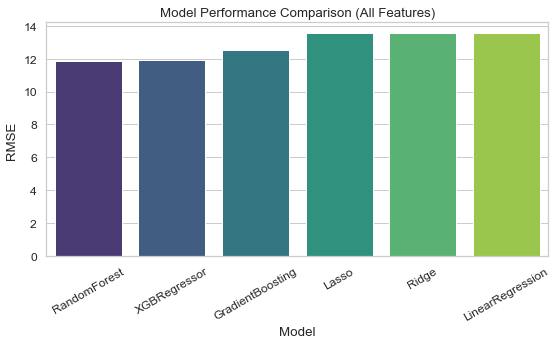

In [9]:
sns.set(style="whitegrid", font_scale=1.1)


plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="viridis")
plt.title("Model Performance Comparison (All Features)")
plt.ylabel("RMSE ")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

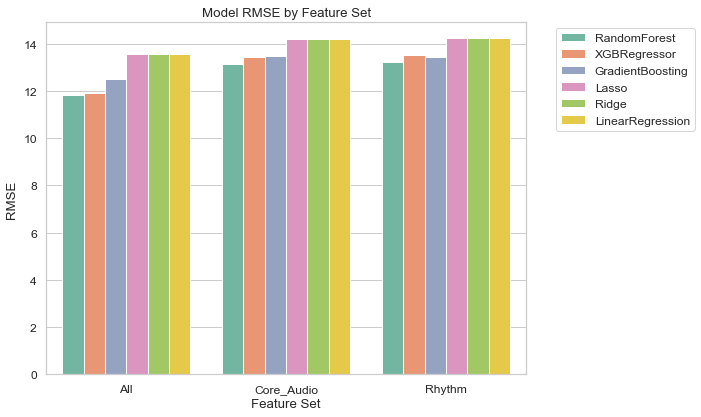

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="FeatureSet", y="RMSE", hue="Model", data=df_results, palette="Set2")
plt.title("Model RMSE by Feature Set")
plt.ylabel("RMSE ")
plt.xlabel("Feature Set")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

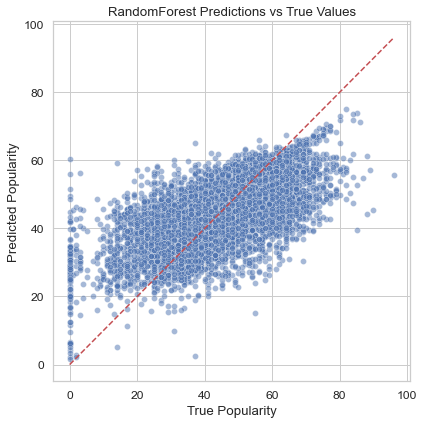

In [8]:
best_model = models["RandomForest"]
best_model.fit(X_train[feature_sets["All"]], y_train)
preds = best_model.predict(X_val[feature_sets["All"]])

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=preds, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True Popularity")
plt.ylabel("Predicted Popularity")
plt.title("RandomForest Predictions vs True Values")
plt.tight_layout()
plt.show()

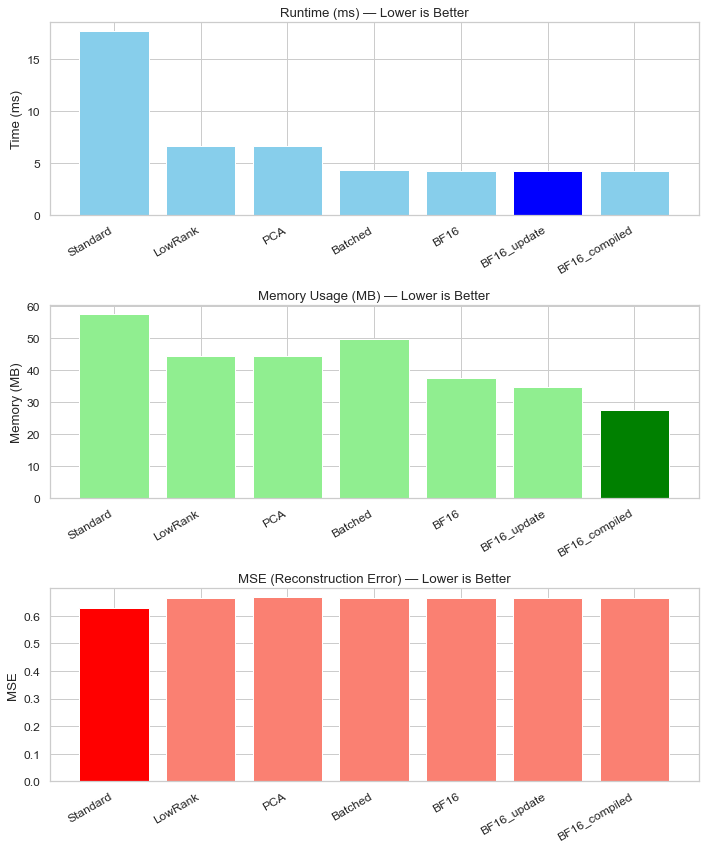

In [11]:
import matplotlib.pyplot as plt
import numpy as np

methods = [
    "Standard", 
    "LowRank", 
    "PCA", 
    "Batched",
    "BF16",
    "BF16_update",
    "BF16_compiled"
]

# Data for sl=4096, nh=4, rank=128
times_ms = [
    17.68,
    6.58,
    6.61,
    4.29,
    4.23,
    4.22,
    4.24
]

memory_mb = [
    57.4,
    44.4,
    44.4,
    49.8,
    37.6,
    34.6,
    27.4
]

mse = [
    0.628276,
    0.666190,
    0.666643,
    0.663502,
    0.663635,
    0.663066,
    0.663776
]

x = np.arange(len(methods))

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# ---- Runtime subplot ----
axs[0].bar(x, times_ms, color="skyblue")
axs[0].set_title("Runtime (ms) — Lower is Better")
axs[0].set_ylabel("Time (ms)")
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=30, ha="right")

# Highlight best
best_idx = np.argmin(times_ms)
axs[0].bar(best_idx, times_ms[best_idx], color="blue")

# ---- Memory subplot ----
axs[1].bar(x, memory_mb, color="lightgreen")
axs[1].set_title("Memory Usage (MB) — Lower is Better")
axs[1].set_ylabel("Memory (MB)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=30, ha="right")

# Highlight best
best_idx = np.argmin(memory_mb)
axs[1].bar(best_idx, memory_mb[best_idx], color="green")

# ---- MSE subplot ----
axs[2].bar(x, mse, color="salmon")
axs[2].set_title("MSE (Reconstruction Error) — Lower is Better")
axs[2].set_ylabel("MSE")
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=30, ha="right")

# Highlight best
best_idx = np.argmin(mse)
axs[2].bar(best_idx, mse[best_idx], color="red")

plt.tight_layout()
plt.show()